<a href="https://colab.research.google.com/github/antonia-04/Inteligenta-artificiala-UBB-teme/blob/main/AI_laborator_2%2C_ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problema 1

S-a efectuat un studiu despre starea domeniului Data Science, iar datele colectate sunt salvate in fisierul "data/surveyDataScience.csv".

1.a. Sa se stabileasca:

* numarul de respondenti (de la care s-au colectate informatiile)
* numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent
* numarul de respondenti pentru care se detin date complete
* durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata), durata medie a anilor de studii pentru respondentii din Romania si durata medie a anilor de studii pentru respondentii din Romania care sunt femei. Comparati rezultatele obtinute pentru cele trei grupuri de respondenti. Se presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani.
* numarul de respondenti femei din Romania pentru care se detin date complete
* numarul de femei din Romania care programeaza in Python, precum si intervalul de varsta cu cele mai multe femei care programeaza in Python? Dar in C++? Comparati rezultatele obtinute pentru cele doua limbaje de programare.
domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature). In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate
* transformati informatiile despre vechimea in programare in numar de ani (folositi in locul intervalului, mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana). Ce se poate spune despre aceasta variabila?


In [ ]:
import pandas as pd

# df - just data, the first 2 rows are the header
df = pd.read_csv('/surveyDataSience.csv', skiprows=2, low_memory=False)
#df1 - all file content
df1 = pd.read_csv('/surveyDataSience.csv', low_memory=False)

# numarul respondentilor: nr de linii din df
print("Numar de respondenti: ", len(df.index))

# numar si tipul informatiilor (atributelor, proprietatilor) detinute pentru un respondent
print("Numar de informatii detinute pentru un respondent: ", len(df.columns))
print("Tipul informatiilor:\n", df.iloc[0].apply(type))

# numarul de respondenti pentru care se detin date complete => nu sunt coloane libere pe linie
print("Numar de respondenti pentru care se detin date complete: ", len(df.dropna()))

# Se presupune ca studiile de licenta dureaza 3 ani, cele de master 2 ani si cele de doctorat 3 ani.
# durata medie a anilor de studii superioare pentru acesti respondenti (cea efectiva sau cea estimata),
distinctEducationLevels = df1['Q4'].dropna().unique()
print("\nToate raspunsurile posibile la educatie:\n", distinctEducationLevels)
# trebuie sa adunam pt ca se cumuleaza studiile
Q4 = {
    "Bachelor's degree": 3,
    "Master's degree": 5,
    "Doctoral degree": 8,
    "I prefer not to answer": 0,
    "Some college/university study without earning a bachelor’s degree": 0,
    "No formal education past high school": 0,
    "Professional doctorate": 8
}
averageEducation = df1['Q4'].map(Q4).mean()
print("\n\nDurata medie a anilor de studii superioare pentru acesti respondenti: ", averageEducation)

# durata medie a anilor de studii pentru respondentii din Romania
romaniaResponders = df1[df1['Q3'] == 'Romania']
averageEducationRo = romaniaResponders['Q4'].map(Q4).mean()
print("Durata medie a anilor de studii pentru respondentii din Romania: ", averageEducationRo)
# durata medie a anilor de studii pentru respondentii din Romania care sunt femei
womenRomaniaResponders = romaniaResponders[romaniaResponders['Q2'] == 'Woman']
averageEducationRoWomen = womenRomaniaResponders['Q4'].map(Q4).mean()
print("Durata medie a anilor de studii pentru respondentii din Romania care sunt femei: ", averageEducationRoWomen)
# Comparati rezultatele obtinute pentru cele trei grupuri de respondenti.
compareEducation = [
    ("Toți respondenții", averageEducation),
    ("Respondenti din România", averageEducationRo),
    ("Femei din România", averageEducationRoWomen)
]
compareEducation.sort(key=lambda x: x[1], reverse=True)
print("\nComparati rezultatele obtinute pentru cele trei grupuri de respondenti:\n", compareEducation)

# numarul de respondenti femei din Romania pentru care se detin date complete
print("\nNumarul de respondenti femei din Romania pentru care se detin date complete: ", len(womenRomaniaResponders.dropna()))
# numarul de femei din Romania care programeaza in Python
pythonRoWomen = womenRomaniaResponders[womenRomaniaResponders['Q7_Part_1'] == 'Python']
print("Numarul de femeie din Romania care programeaza in Python: ", len(pythonRoWomen))
# intervalul de varsta cu cele mai multe femei care programeaza in Python
womanResponders = df1[(df1['Q2'] == 'Woman') & (df1['Q7_Part_1'] == 'Python')]
ageWomanPython = womanResponders['Q1'].value_counts()
print("Intervalul de varsta cu cele mai multe femei care programeaza in Python: ", ageWomanPython.idxmax())

# numarul de femei din Romania care programeaza in C++
cplusRoWomen = womenRomaniaResponders[womenRomaniaResponders['Q7_Part_5'] == 'C++']
print("Numarul de femeie din Romania care programeaza in C++: ", len(cplusRoWomen))

# compara pythonRoWomen si cplusRoWomen
comparePythonCplus = [
    ("Python", len(pythonRoWomen)),
    ("C++", len(cplusRoWomen))
]
comparePythonCplus.sort(key=lambda x: x[1], reverse=True)
print("\nComparati rezultatele obtinute pentru cele doua limbaje de programare:\n", comparePythonCplus)

# transformati informatiile despre vechimea in programare in numar de ani
experience = {
        'I have never written code': 0,
        '< 1 years': 0.5,
        '1-3 years': 2,
        '3-5 years': 4,
        '5-10 years': 7.5,
        '10-20 years': 15,
        '20+ years': 20,
}
# calculati momentele de ordin 1 si 2 pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana).
minExperience = df1['Q6'].map(experience).min()  # valoarea minimă
maxExperience = df1['Q6'].map(experience).max()  # valoarea maximă
meanExperience = df1['Q6'].map(experience).mean()  # media
stdExperience = df1['Q6'].map(experience).std()  # deviația standard
medianExperience = df1['Q6'].map(experience).median()  # mediana
print("\nMomentele de ordin 1 și 2 pentru durata medie a anilor de programare:")
print(f"- Min: {minExperience}")
print(f"- Max: {maxExperience}")
print(f"- Media: {meanExperience}")
print(f"- Deviația standard: {stdExperience}")
print(f"- Mediana: {medianExperience}")

Numar de respondenti:  25972
Numar de informatii detinute pentru un respondent:  369
Tipul informatiilor:
 910                    <class 'numpy.int64'>
50-54                          <class 'str'>
Man                            <class 'str'>
India                          <class 'str'>
Bachelor’s degree              <class 'str'>
                              ...           
Unnamed: 364                 <class 'float'>
Unnamed: 365                 <class 'float'>
Unnamed: 366                 <class 'float'>
Unnamed: 367         <class 'numpy.float64'>
Unnamed: 368                 <class 'float'>
Name: 0, Length: 369, dtype: object
Numar de respondenti pentru care se detin date complete:  0

Toate raspunsurile posibile la educatie:
 ['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'
 'Bachelor’s degree' 'Master’s degree' 'Doctoral degree'
 'I prefer not to answer'
 'Some college/university study without earning a bachelor’s 

In [ ]:
# domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature).
# In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate
print("\nDomeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature):\n")

for col in df1.columns:
    # verificam DOAR dupa antet!!
    unique_vals = df1[col].iloc[1:].dropna().unique()  # elimină valorile nule
    num_unique = len(unique_vals)

    # dacă sunt doar valori nule
    if num_unique == 0:
        print(f"- {col}: 1 opțiune posibila")

    # dacă este doar o valoare unică pentru toți respondenții
    elif num_unique == 1:
        print(f"- {col}: 1 opțiune posibila (ex: {unique_vals[0]})")

    # dacă sunt mai multe valori
    else:
        if df1[col].dtype == 'object':  # de tip text
            print(f"- {col}: {num_unique} răspunsuri distincte")
        else:  # numere
            print(f"- {col}: Min={df1[col].min()}, Max={df1[col].max()}")


Domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature):

- Time from Start to Finish (seconds): 4421 răspunsuri distincte
- Q1: 11 răspunsuri distincte
- Q2: 5 răspunsuri distincte
- Q3: 66 răspunsuri distincte
- Q4: 7 răspunsuri distincte
- Q5: 15 răspunsuri distincte
- Q6: 7 răspunsuri distincte
- Q7_Part_1: 1 opțiune posibila (ex: Python)
- Q7_Part_2: 1 opțiune posibila (ex: R)
- Q7_Part_3: 1 opțiune posibila (ex: SQL)
- Q7_Part_4: 1 opțiune posibila (ex: C)
- Q7_Part_5: 1 opțiune posibila (ex: C++)
- Q7_Part_6: 1 opțiune posibila (ex: Java)
- Q7_Part_7: 1 opțiune posibila (ex: Javascript)
- Q7_Part_8: 1 opțiune posibila (ex: Julia)
- Q7_Part_9: 1 opțiune posibila (ex: Swift)
- Q7_Part_10: 1 opțiune posibila (ex: Bash)
- Q7_Part_11: 1 opțiune posibila (ex: MATLAB)
- Q7_Part_12: 1 opțiune posibila
- Q7_OTHER: 1 opțiune posibila (ex: Other)
- Q8: 12 răspunsuri distincte
- Q9_Part_1: 1 opțiune posibila (ex: Jupyter (JupyterLab, Jupyter Notebooks, 

1.b. Sa se vizualizeze:

* distributia respondentilor care programeaza in Python pe categorii de varsta
* distributia respondentilor din Romania care programeaza in Python pe categorii de varsta
* distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta
* respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare (puteti folositi un boxplot pentru a identifica aceste valori)

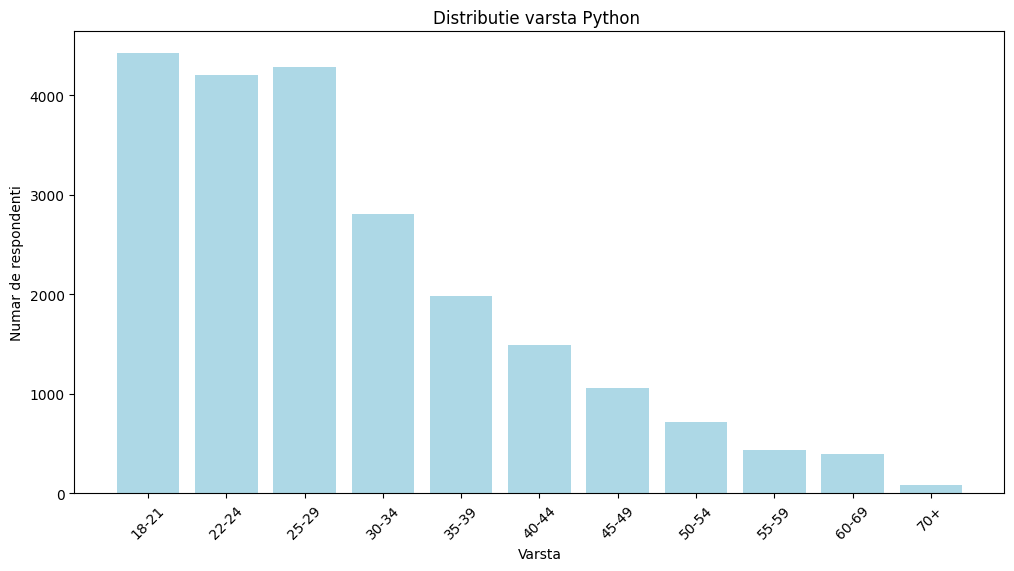

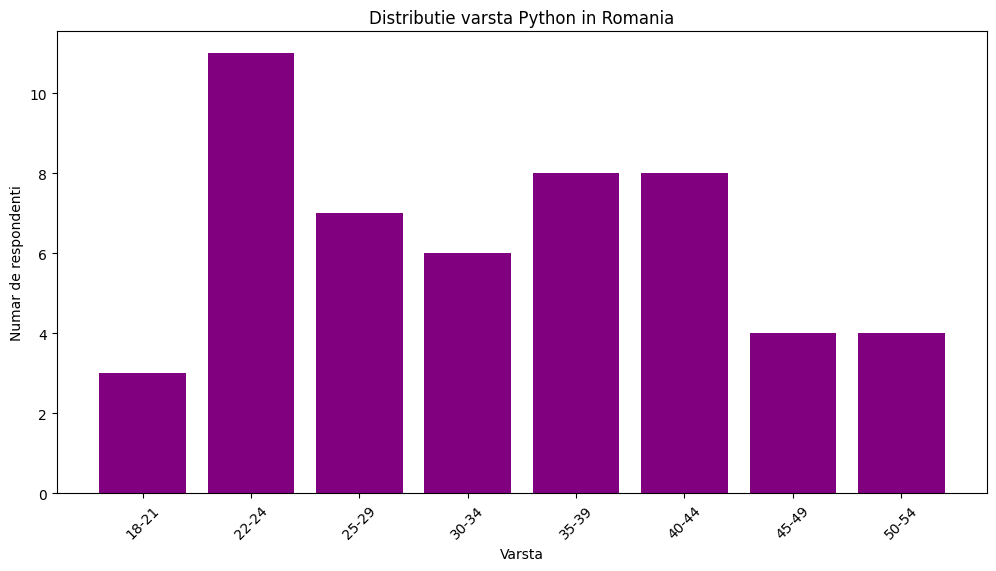

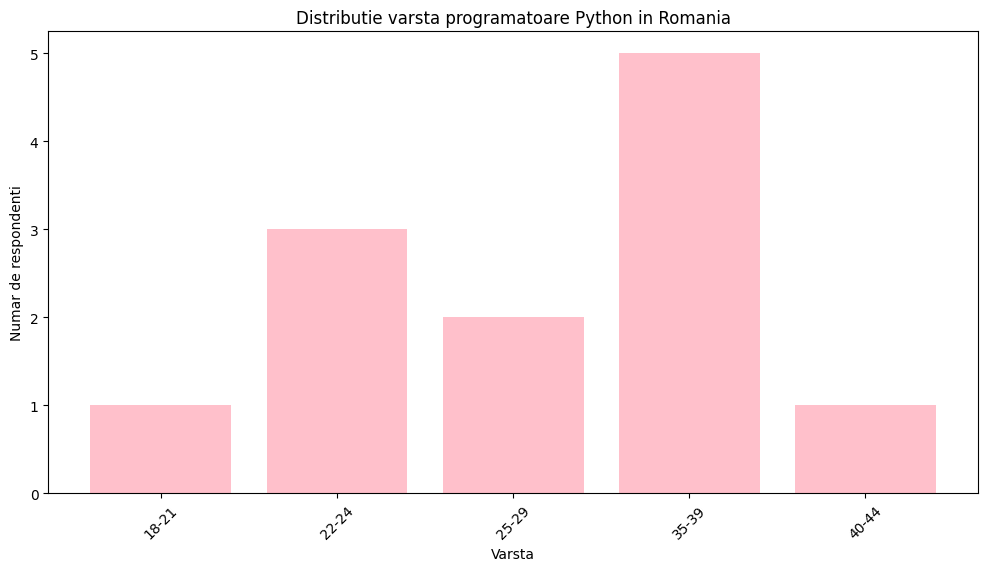

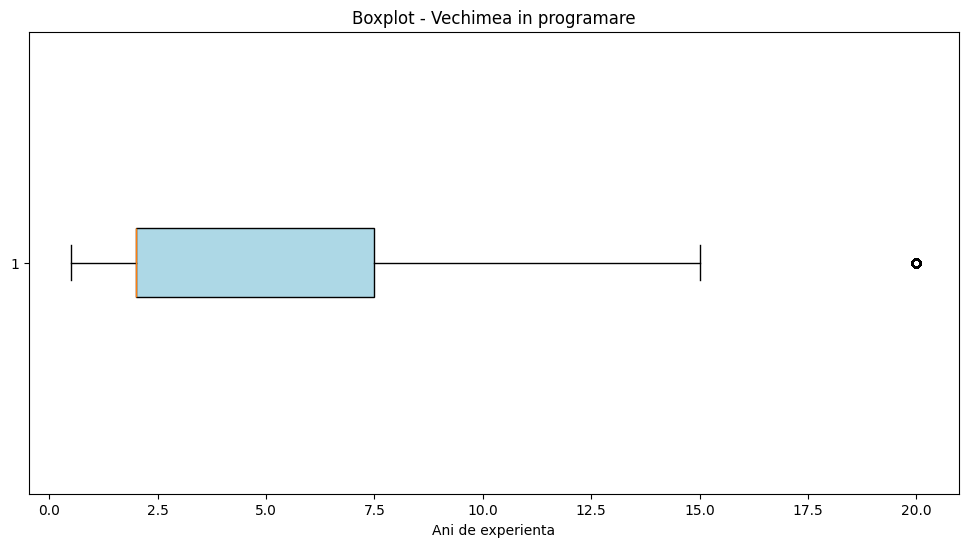


📌 Respondentii considerati outlieri din punct de vedere al vechimii in programare:
          Q1   Q2                                                 Q3  \
2      50-54  Man                                          Indonesia   
4      45-49  Man                                             Mexico   
17     50-54  Man                                            Belgium   
24     35-39  Man                                             Brazil   
70     40-44  Man  United Kingdom of Great Britain and Northern I...   
...      ...  ...                                                ...   
25863  35-39  Man                                             Brazil   
25888  60-69  Man                           United States of America   
25911  55-59  Man                           United States of America   
25925  60-69  Man                                              India   
25964  60-69  Man                           United States of America   

       YearsExperience  
2                 20.0  
4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# df - just data, the first 2 rows are the header
data = pd.read_csv('/surveyDataSience.csv', low_memory=False)

# distributia respondentilor care programeaza in Python pe categorii de varsta
pythonResponders = data[data['Q7_Part_1'] == 'Python']
ageCountsPython = pythonResponders['Q1'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(ageCountsPython.index, ageCountsPython.values, color='lightblue')
plt.title('Distributie varsta Python ')
plt.xlabel('Varsta')
plt.ylabel('Numar de respondenti')
plt.xticks(rotation=45)
plt.show()

# distributia respondentilor din Romania care programeaza in Python pe categorii de varsta
romaniaResponders = data[data['Q3'] == 'Romania']
pythonRomaniaResponders = romaniaResponders[romaniaResponders['Q7_Part_1'] == 'Python']
ageCountsPythonRo = pythonRomaniaResponders['Q1'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(ageCountsPythonRo.index, ageCountsPythonRo.values, color='purple')
plt.title('Distributie varsta Python in Romania')
plt.xlabel('Varsta')
plt.ylabel('Numar de respondenti')
plt.xticks(rotation=45)

# distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta
womenRomaniaRespondersPy = pythonRomaniaResponders[pythonRomaniaResponders['Q2'] == 'Woman']
ageCountsPythonRoWomen = womenRomaniaRespondersPy['Q1'].value_counts().sort_index()
plt.figure(figsize=(12,6))
plt.bar(ageCountsPythonRoWomen.index, ageCountsPythonRoWomen.values, color='pink')
plt.title('Distributie varsta programatoare Python in Romania')
plt.xlabel('Varsta')
plt.ylabel('Numar de respondenti')
plt.xticks(rotation=45)
plt.show()

# respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare
# (puteti folositi un boxplot pentru a identifica aceste valori)
data['YearsExperience'] = data['Q6'].map(experience)
data1 = data.dropna(subset=['YearsExperience'])
meanValue = data1['YearsExperience'].mean()

plt.figure(figsize=(12, 6))
plt.boxplot(
    data1['YearsExperience'],
    vert=False,
    patch_artist=True,
    boxprops=dict(facecolor="lightblue")
)
plt.title('Boxplot - Vechimea in programare')
plt.xlabel('Ani de experienta')
plt.show()
